In [1]:
import pyspark, pandas
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() 
spark

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

plt.style.use('seaborn-colorblind')

%matplotlib inline

In [3]:
ca_df= spark.read.csv("./data/CAvideos.csv", header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv", header=True, inferSchema=True)

In [4]:
ca_df.toPandas().head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"""Eminem""|""Walk""|""On""|""Water""|""Aftermath/Shady/...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"""plush""|""bad unboxing""|""unboxing""|""fan mail""|""...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"""edsheeran""|""ed sheeran""|""acoustic""|""live""|""co...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
print("Default schema as inferred by spark:")
ca_df.printSchema()

Default schema as inferred by spark:
root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [6]:
from pyspark.sql.types import StructType, StructField, TimestampType, StringType, BooleanType, DoubleType, IntegerType
schema1 = StructType([
    StructField("video_id", StringType(), True),
    StructField("trending_date", StringType(), True),
    StructField("title", StringType(), True),
    StructField("channel_title", StringType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("publish_time", TimestampType(), True),
    StructField("tags", StringType(), True),
    StructField("views", IntegerType(), True),
    StructField("likes", IntegerType(), True),
    StructField("dislikes", IntegerType(), True),
    StructField("comment_count", IntegerType(), True),
    StructField("thumbnail_link", StringType(), True),
    StructField("comments_disabled", BooleanType(), True),
    StructField("ratings_disabled", BooleanType(), True),
    StructField("video_error_or_removed", BooleanType(), True),
    StructField("description", StringType(), True)])

In [7]:
ca_df= spark.read.csv("./data/CAvideos.csv",  schema=schema1, header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv",  schema=schema1,header=True, inferSchema=True)
fr_df= spark.read.csv("./data/FRvideos.csv", schema=schema1, header=True, inferSchema=True)
in_df= spark.read.csv("./data/INvideos.csv", schema=schema1, header=True, inferSchema=True)
gb_df= spark.read.csv("./data/GBvideos.csv", schema=schema1, header=True, inferSchema=True)

ca_cid = json.load(open('./data/CA_category_id.json'))
us_cid = json.load(open('./data/US_category_id.json'))
fr_cid = json.load(open('./data/FR_category_id.json'))
in_cid = json.load(open('./data/IN_category_id.json'))
gb_cid = json.load(open('./data/GB_category_id.json'))

In [8]:
ca_df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [9]:
from pyspark.sql.functions import lit, create_map
from itertools import chain
ca_df = ca_df.withColumn("country",lit("Canada"))
us_df = us_df.withColumn("country",lit("USA"))
fr_df = fr_df.withColumn("country",lit("France"))
in_df = in_df.withColumn("country",lit("India"))
gb_df = gb_df.withColumn("country",lit("Britain"))

In [10]:
from functools import reduce
from pyspark.sql import DataFrame

df_all = reduce(DataFrame.unionAll, [ca_df,us_df,fr_df,in_df,gb_df])
df_all.count()

221658

In [11]:
#converting category id to category
id_to_category = {}
for category in ca_cid['items']:
    id_to_category[category['id']] = category['snippet']['title']
id_to_category

mapping_expr = create_map([lit(x) for x in chain(*id_to_category.items())])
df_all = df_all.withColumn("category",mapping_expr[df_all['category_id']])

In [12]:
# dropping unnecessary columns
df_all= df_all.drop('category_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed')

In [13]:
df_all.toPandas().head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,country,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10 17:00:03,"""Eminem""|""Walk""|""On""|""Water""|""Aftermath/Shady/...",17158579.0,787425.0,43420.0,125882.0,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13 17:00:00,"""plush""|""bad unboxing""|""unboxing""|""fan mail""|""...",1014651.0,127794.0,1688.0,13030.0,STill got a lot of packages. Probably will las...,Canada,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434.0,146035.0,5339.0,8181.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095828.0,132239.0,1989.0,17518.0,I know it's been a while since we did this sho...,Canada,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09 11:04:14,"""edsheeran""|""ed sheeran""|""acoustic""|""live""|""co...",33523622.0,1634130.0,21082.0,85067.0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada,Music


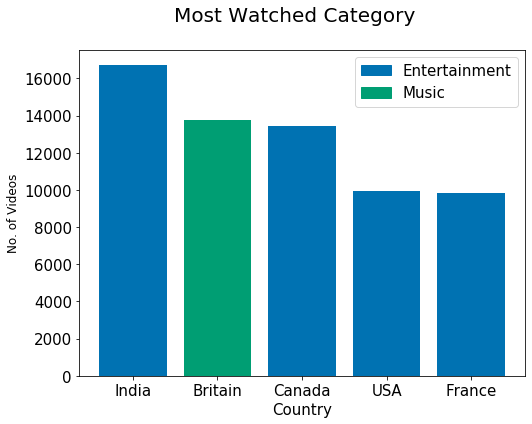

In [14]:
most_watched_category= df_all.select('country','category','title').groupby(['country','category']).count().orderBy('count',ascending=False).toPandas().head(5)

import matplotlib.patches as mpatches

plt.figure(figsize=(8,6))
plt.bar(most_watched_category['country'],most_watched_category['count'], color=['C0', 'C1', 'C0', 'C0', 'C0'])
c0 = mpatches.Patch(color='C0', label='Entertainment')
c1 = mpatches.Patch(color='C1', label='Music')
plt.grid(False)
plt.suptitle('Most Watched Category', fontsize=20)
plt.ylabel("No. of Videos",fontsize=12)
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(handles=[c0, c1],fontsize=15)
plt.show();

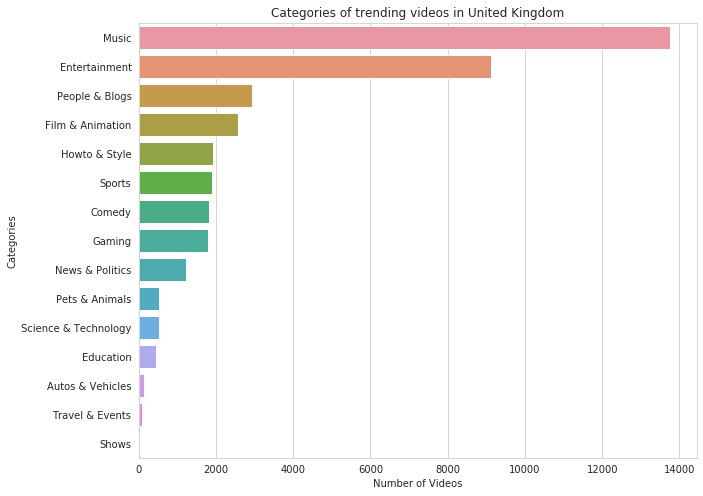

In [15]:
df2= df_all.toPandas()
cat_df_gb = df2[df2['country']=='Britain']['category'].value_counts().reset_index()
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb, orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Categories of trending videos in United Kingdom");

In [16]:
import pyspark.sql.functions
from pyspark.sql.functions import col,min, max

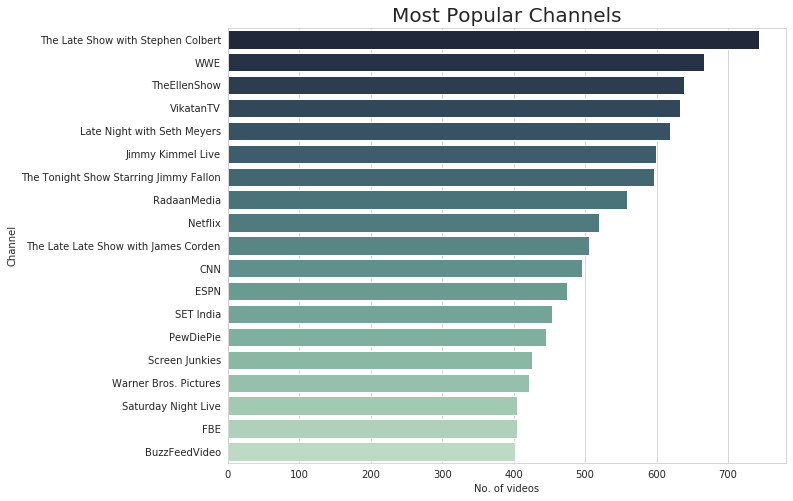

In [17]:
most_watched_channel= df_all.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).toPandas().head(20)

most_watched_channel.dropna()
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Most Popular Channels",fontsize=20)
sns.barplot(x="count", y="channel_title", data=most_watched_channel, palette=sns.cubehelix_palette(n_colors=20,reverse=True,rot=-.4), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");